In [1]:
import pandas as pd

from proxbias.depmap.process import bootstrap_stats, split_models
from proxbias.depmap.load import get_depmap_data
from proxbias.utils.data_utils import get_cancer_gene_lists
from proxbias.metrics import genome_proximity_bias_score

In [2]:
crispr_effect, _, cnv_data, mutation_data = get_depmap_data(rnai_release="")
oncogenes, tsgs = get_cancer_gene_lists(crispr_effect.index)

CRISPRGeneEffect.csv from DepMap Public 22Q4 is found. Reading dataframe from cache.
Done!
OmicsCNGene.csv from DepMap Public 22Q4 is found. Reading dataframe from cache.
Done!
OmicsSomaticMutations.csv from DepMap Public 22Q4 is found. Reading dataframe from cache.
Done!


In [3]:
tp53_lof_models, tp53_wt_models, tp53_amp_models, _ = split_models(
    gene_symbol="TP53",
    candidate_models=crispr_effect.columns,
    cnv_data=cnv_data,
    mutation_data=mutation_data
)

_, _, tp53_amp_filtered_models, _ = split_models(
    gene_symbol="TP53",
    candidate_models=crispr_effect.columns,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    filter_amp=True,
)

In [4]:
# Note - n_workers should likely be around half the number of CPUs
res = bootstrap_stats(
    genes_of_interest=["TP53"],
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=list(crispr_effect.columns),
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=1,
    filter_amp=True,
)
res.to_csv("outputs/TP53_lof_bootstrap_results.csv")

Stats for TP53 computed in 231.000803232193 - diff is 0.031617069531249986, 266 wt and 277 lof


In [5]:
# top on TP53 LOF

fixed_sampling_lof_tp53_lof = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="lof",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=64,
    fixed_sampling=True,
)
fixed_sampling_lof_tp53_lof.to_csv("outputs/fixed_sampling_lof_bootstrap_results_tp53_lof.csv")

fixed_sampling_amp_filtered_tp53_lof = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=64,
    fixed_sampling=True,
    filter_amp=True,
)
fixed_sampling_amp_filtered_tp53_lof.to_csv("outputs/fixed_sampling_amp_filtered_bootstrap_results_tp53_lof.csv")

# top on TP53 WT

fixed_sampling_lof_tp53_wt = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="lof",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=64,
    fixed_sampling=True,
)
fixed_sampling_lof_tp53_wt.to_csv("outputs/fixed_sampling_lof_bootstrap_results_tp53_wt.csv")

fixed_sampling_amp_filtered_tp53_wt = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=64,
    fixed_sampling=True,
    filter_amp=True,
)
fixed_sampling_amp_filtered_tp53_wt.to_csv("outputs/fixed_sampling_amp_filtered_bootstrap_results_tp53_wt.csv")

Index(['IGF2', 'IRF1', 'TNFSF13'], dtype='object') not found in data.
Stats for ABL1 computed in 257.6990020275116 - diff is -0.010123241875000022, 183 wt and 42 lof
Stats for ACKR3 computed in 286.4089124202728 - diff is -0.011283091874999984, 219 wt and 42 lof
Stats for AKT1 computed in 367.6657667160034 - diff is 0.0029568087499999285, 181 wt and 46 lof
Stats for AGO1 computed in 378.9646546840668 - diff is -0.0009323543750000551, 198 wt and 43 lof
Stats for AJUBA computed in 401.51444816589355 - diff is 0.024451910624999962, 184 wt and 49 lof
Stats for AMER1 computed in 395.52933979034424 - diff is 0.011960447500000027, 79 wt and 181 lof
Stats for AFF4 computed in 437.0922465324402 - diff is 0.005512955624999982, 202 wt and 29 lof
Stats for ARID1B computed in 417.9615914821625 - diff is 0.002205733749999994, 159 wt and 72 lof
Stats for AKT2 computed in 433.8905827999115 - diff is 0.0002158712499999993, 189 wt and 36 lof
Stats for ARID3B computed in 422.3649263381958 - diff is 0.008

In [36]:
fixed_sampling_lof_tp53_lof = pd.read_csv("outputs/fixed_sampling_lof_bootstrap_results_tp53_lof.csv", index_col=0)
fixed_sampling_lof_tp53_lof["tp53"] = "lof"
fixed_sampling_amp_filtered_tp53_lof = pd.read_csv("outputs/fixed_sampling_amp_filtered_bootstrap_results_tp53_lof.csv", index_col=0)
fixed_sampling_amp_filtered_tp53_lof["tp53"] = "lof"
fixed_sampling_lof_tp53_wt = pd.read_csv("outputs/fixed_sampling_lof_bootstrap_results_tp53_wt.csv", index_col=0)
fixed_sampling_lof_tp53_wt["tp53"] = "wt"
fixed_sampling_amp_filtered_tp53_wt = pd.read_csv("outputs/fixed_sampling_amp_filtered_bootstrap_results_tp53_wt.csv", index_col=0)
fixed_sampling_amp_filtered_tp53_wt["tp53"] = "wt"
combined = pd.concat([fixed_sampling_lof_tp53_lof, fixed_sampling_amp_filtered_tp53_lof, fixed_sampling_lof_tp53_wt, fixed_sampling_amp_filtered_tp53_wt])
combined['abs_diff'] = combined["diff"].abs()
combined.to_csv("outputs/fixed_sampling.csv")
for tp53 in ["lof", "wt"]:
    for search_mode in ["lof", "amp"]:
        for ascending in [True, False]:
            print(f"tp53: {tp53}, search_mode: {search_mode}, {'bottom' if ascending else 'top'} \n \n")
            if ascending:
                candidates = combined.loc[(combined["tp53"] == tp53) & (combined["search_mode"] == search_mode) & (combined["diff"] <= -.01)]
            else:
                candidates = combined.loc[(combined["tp53"] == tp53) & (combined["search_mode"] == search_mode) & (combined["diff"] >= .02)]
            for gene in candidates.sort_values("abs_diff", ascending=ascending).index:
                print(f"{gene},")
            print("\n\n\n")

tp53: lof, search_mode: lof, botom 
 

PPP2R1A,
CTR9,
ABL1,
TLX1,
SET,
CBFB,
VAV2,
ANKRD11,
MUTYH,
SMC3,
NF2,
CD28,
TAL1,
ACKR3,
PGR,
DDX4,
MAPK1,
MYCL,
SESN3,
MPL,
IL6ST,
LZTR1,
CTLA4,
CRKL,
PDGFB,
CTCF,
YES1,
MAP3K1,
CUL3,
RET,
YAP1,
BRSK1,
PLCG2,
NCOR1,
HLA-C,
IRS1,
TET1,
INHA,
MKI67,
CHTF8,
POLD1,
SP140,
HLA-B,
BMPR1A,
IRF8,
PTEN,
FAS,
FGFR2,
MAP2K4,
PRPF8,




tp53: lof, search_mode: lof, top 
 

BRCA1,
POLE,
STAT3,
STAT5A,
STAT5B,
ERCC4,
EZH1,
CDK12,
SMG1,
SMARCE1,
ATP1A1,
SOCS1,
SLX4,
TENT5C,
PALB2,
MYH11,
FUS,
PDCD1LG2,
CREBBP,
AJUBA,
MAPK3,
PTPRD,
SETD1A,
CD274,
RBM15,
NTHL1,
CIITA,
CDKN2A,
JAK2,
MST1,




tp53: lof, search_mode: amp, botom 
 

HLA-C,
BRSK1,
BTG1,
MDM4,
ERG,
NOTCH3,
TBX3,
DIS3,
ESR1,
RB1,
ABL2,
BRD4,
POLD1,
LATS2,




tp53: lof, search_mode: amp, top 
 

MYOD1,
SMARCB1,
RECQL,
MAP3K1,
IL6ST,
FANCA,
DDX4,
FANCD2,
KRAS,
LMO1,
RAD17,
VHL,
MITF,
PIK3R1,
HTATIP2,
WT1,
CTR9,
PPARG,
RAF1,
CYLD,
SHQ1,
NUP98,
RASA1,
GNAQ,
FGF19,
ZFHX3,
ARHGEF28,
CCND2,
RET,
RRAS2,
FOXP

In [45]:
interesting = combined.loc[(combined["search_mode"] == "amp") & (combined["diff"] <= -.01)].sort_values("abs_diff", ascending=False).index

In [51]:
interesting_subset = combined.loc[interesting].reset_index().sort_values("abs_diff", ascending=False).groupby("index").abs_diff.apply(lambda x: x.max() - x.min()).sort_values(ascending=False).index[:5]

combined.loc[interesting_subset]

,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,tp53,abs_diff
index,,,,,,,,,,,
HLA-C,"[0.5611404600000001, 0.55207432, 0.57577897999...",0.563013,"[0.5877941799999999, 0.5682311, 0.59360768, 0....",0.577509,-0.014496,lof,20,42,156,lof,0.014496
HLA-C,"[0.57170364, 0.56301852, 0.55798776, 0.5527666...",0.567317,"[0.5877941799999999, 0.5682311, 0.59360768, 0....",0.577509,-0.010192,amp,20,53,156,lof,0.010192
HLA-C,"[0.54881368, 0.5467082400000001, 0.55308678, 0...",0.555949,"[0.55124342, 0.5562300599999999, 0.53651246, 0...",0.553546,0.002404,lof,20,32,158,wt,0.002404
HLA-C,"[0.5742520600000001, 0.58114192, 0.56600111999...",0.577456,"[0.55124342, 0.5562300599999999, 0.53651246, 0...",0.553546,0.023910,amp,20,33,158,wt,0.023910
PPP2R1A,"[0.56737368, 0.5592195, 0.56686468, 0.57325394...",0.565016,"[0.57955544, 0.57396642, 0.56165466, 0.5530285...",0.575044,-0.010028,lof,20,41,182,lof,0.010028
PPP2R1A,"[0.56234842, 0.5541769999999999, 0.55687958, 0...",0.569079,"[0.57955544, 0.57396642, 0.56165466, 0.5530285...",0.575044,-0.005965,amp,20,49,182,lof,0.005965
PPP2R1A,"[0.54075392, 0.5316274999999999, 0.54115952, 0...",0.538631,"[0.5690715000000001, 0.56907786, 0.55306464000...",0.564888,-0.026258,amp,20,25,223,wt,0.026258
ALK,"[0.57901634, 0.56546828, 0.56075494, 0.5696201...",0.570674,"[0.56592914, 0.56455734, 0.5602161200000001, 0...",0.576418,-0.005744,amp,20,35,214,lof,0.005744
ALK,"[0.52814478, 0.53581216, 0.5314273, 0.53919078...",0.539865,"[0.5650812399999999, 0.55745168, 0.5761824, 0....",0.563382,-0.023518,amp,20,33,204,wt,0.023518


In [19]:
# Subset down to the genes that seem to have a strong effect based off of 4 bootstraps

all_lof_tp53_wt = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="lof",
    n_bootstrap=4,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
)

all_amp_tp53_wt = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=4,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
    filter_amp=True,
)

four_bootstrap_tp53_wt = pd.concat([all_lof_tp53_wt, all_amp_tp53_wt], axis=0)
four_bootstrap_tp53_wt.to_csv("outputs/four_bootstrap_tp53_wt_results.csv")

Index(['IGF2', 'IRF1', 'TNFSF13'], dtype='object') not found in data.
Stats for ABRAXAS1 computed in 14.372844219207764 - diff is 0.045973785000000045, 218 wt and 40 lof
Stats for AJUBA computed in 18.45163607597351 - diff is 0.0038755550000000305, 200 wt and 38 lof
Stats for AKT1 computed in 18.618773221969604 - diff is 0.0070602450000000205, 192 wt and 42 lof
Stats for AMER1 computed in 20.02819013595581 - diff is 0.011521204999999979, 93 wt and 161 lof
Stats for AR computed in 21.476511240005493 - diff is -0.0020547450000000245, 88 wt and 163 lof
Stats for ARAF computed in 22.405717611312866 - diff is 0.010171694999999925, 88 wt and 164 lof
Stats for ARID1A computed in 23.37591791152954 - diff is -0.002491880000000002, 179 wt and 35 lof
Stats for ARID1B computed in 23.205621004104614 - diff is 0.010847880000000032, 179 wt and 47 lof
Stats for ARID4A computed in 24.578675031661987 - diff is -0.0018389150000001075, 196 wt and 36 lof
Stats for ARID5B computed in 25.36480736732483 - dif

In [4]:
all_lof_tp53_lof = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="lof",
    n_bootstrap=4,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
)

all_amp_tp53_lof = bootstrap_stats(
    genes_of_interest=tsgs + oncogenes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=4,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
    filter_amp=True,
)

four_bootstrap_tp53_lof = pd.concat([all_lof_tp53_lof, all_amp_tp53_lof], axis=0)
four_bootstrap_tp53_lof.to_csv("outputs/four_bootstrap_tp53_lof_results.csv")

Index(['IGF2', 'IRF1', 'TNFSF13'], dtype='object') not found in data.


Stats for ABL1 computed in 18.0526020526886 - diff is -0.012761935000000113, 183 wt and 42 lof
Stats for ABRAXAS1 computed in 18.59200882911682 - diff is 0.00945825499999986, 206 wt and 58 lof
Stats for ACKR3 computed in 19.365107774734497 - diff is -0.026047390000000004, 219 wt and 42 lof
Stats for AFF4 computed in 23.66786551475525 - diff is 0.013957020000000098, 202 wt and 29 lof
Stats for AGO1 computed in 25.086636543273926 - diff is 0.002358014999999991, 198 wt and 43 lof
Stats for AJUBA computed in 27.311754941940308 - diff is 0.016314799999999963, 184 wt and 49 lof
Stats for AKT1 computed in 26.99698758125305 - diff is 0.004288884999999909, 181 wt and 46 lof
Stats for AKT2 computed in 28.095892190933228 - diff is 0.007999275000000083, 189 wt and 36 lof
Stats for AMER1 computed in 29.161513090133667 - diff is 0.011445439999999918, 79 wt and 181 lof
Stats for ANKRD11 computed in 30.620105981826782 - diff is -0.002993044999999972, 141 wt and 59 lof
Stats for APC computed in 30.8107

In [4]:
four_bootstrap_tp53_lof = pd.read_csv("outputs/four_bootstrap_tp53_lof_results.csv", index_col=0)
four_bootstrap_tp53_lof["abs_diff"] = four_bootstrap_tp53_lof["diff"].abs()
four_bootstrap_tp53_lof["tp53"] = "lof"

four_bootstrap_tp53_wt = pd.read_csv("outputs/four_bootstrap_tp53_wt_results.csv", index_col=0)
four_bootstrap_tp53_wt["abs_diff"] = four_bootstrap_tp53_wt["diff"].abs()
four_bootstrap_tp53_wt["tp53"] = "wt"

combined = pd.concat([four_bootstrap_tp53_lof, four_bootstrap_tp53_wt], axis=0)
combined = combined.sort_values("abs_diff", ascending=False)

top_lof_genes = list(combined.loc[combined["tp53"] == "lof"].index.unique()[:100])
top_wt_genes = list(combined.loc[combined["tp53"] == "wt"].index.unique()[:100])

In [5]:
combined.to_csv("outputs/combined_four_bootstrap_results.csv")

In [21]:
combined.loc['MDM4']

,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,abs_diff,tp53
MDM4,"[0.61311076, 0.60298466, 0.6091877, 0.61463799...",0.609980,"[0.61818872, 0.64448218, 0.6278965999999999, 0...",0.629407,-0.019427,amp,63,79,187,0.019427,lof
MDM4,"[0.60226064, 0.61556978, 0.6003597800000001, 0...",0.606009,"[0.58556076, 0.59663688, 0.58595814, 0.5912840...",0.589860,0.016149,amp,69,87,174,0.016149,wt


In [22]:
combined.head(50)

,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,abs_diff,tp53
STAT5B,"[0.62091858, 0.60725458, 0.61068534, 0.60034394]",0.609801,"[0.57164958, 0.55070746, 0.5411863, 0.55573332]",0.554819,0.054981,lof,21,27,180,0.054981,lof
PDGFRB,"[0.6149859200000001, 0.6223293000000001, 0.607...",0.612120,"[0.55251984, 0.558787, 0.5562982599999999, 0.5...",0.557990,0.054130,amp,37,47,203,0.054130,wt
SQSTM1,"[0.6093229800000001, 0.60441276, 0.62813656000...",0.611023,"[0.5574067199999999, 0.5751299400000001, 0.551...",0.560122,0.050901,amp,38,48,207,0.050901,wt
RECQL,"[0.63907588, 0.6486454, 0.6550471, 0.6470515]",0.647455,"[0.58359224, 0.60324576, 0.5926823999999999, 0...",0.596891,0.050564,amp,50,63,180,0.050564,lof
EIF4E,"[0.60474806, 0.61052928, 0.61162006, 0.62031448]",0.611803,"[0.56270074, 0.5537719600000001, 0.56142886, 0...",0.561310,0.050493,lof,31,39,218,0.050493,wt
NCOA3,"[0.63429278, 0.6277913199999999, 0.63004662, 0...",0.628915,"[0.58624634, 0.5741716800000001, 0.5782351, 0....",0.578937,0.049978,amp,76,96,158,0.049978,wt
CDKN2A,"[0.6263628000000001, 0.6584372, 0.64522464, 0....",0.642079,"[0.58637964, 0.5922116399999999, 0.59791374, 0...",0.592519,0.049559,lof,65,156,82,0.049559,lof
RASA1,"[0.59296822, 0.60955526, 0.5937147199999999, 0...",0.598254,"[0.5517271, 0.54828756, 0.54121788, 0.55579260...",0.549256,0.048998,amp,20,26,218,0.048998,wt
KRAS,"[0.6363911600000001, 0.6471104799999999, 0.646...",0.647522,"[0.6053329799999999, 0.6093973800000001, 0.590...",0.598919,0.048603,amp,55,69,163,0.048603,lof
DDX41,"[0.6159805, 0.60088836, 0.61689354, 0.61143808]",0.611300,"[0.55437284, 0.56685364, 0.5664627400000001, 0...",0.562899,0.048402,amp,38,48,203,0.048402,wt


In [23]:
max_diff = combined.reset_index().groupby(["index"])['diff'].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)

combined.loc[max_diff.index[0:20]]

,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,abs_diff,tp53
index,,,,,,,,,,,
SMARCB1,"[0.61740562, 0.6173487, 0.61653854, 0.63635544]",0.621912,"[0.57182374, 0.5757190600000001, 0.57361739999...",0.576998,0.044914,amp,28,36,163,0.044914,lof
SMARCB1,"[0.56145282, 0.5640757399999999, 0.5530516, 0....",0.560619,"[0.5623764, 0.57677008, 0.6032451799999999, 0....",0.580246,-0.019627,lof,36,45,197,0.019627,wt
SMARCB1,"[0.58606794, 0.6063902, 0.59725072, 0.60704596]",0.599189,"[0.59937642, 0.62077182, 0.60934388, 0.61024108]",0.609933,-0.010745,lof,59,74,163,0.010745,lof
SETBP1,"[0.61530306, 0.60887514, 0.60588988, 0.61301766]",0.610771,"[0.57066596, 0.56666736, 0.5662146, 0.56406543...",0.566903,0.043868,lof,40,50,180,0.043868,wt
SETBP1,"[0.6323048400000001, 0.6272772799999999, 0.629...",0.628795,"[0.6345941, 0.6423364, 0.6436815399999999, 0.6...",0.643422,-0.014627,lof,90,127,113,0.014627,lof
SETBP1,"[0.58130664, 0.57056692, 0.59032898, 0.57658304]",0.579696,"[0.5734728, 0.56584624, 0.580133, 0.56351312]",0.570741,0.008955,amp,20,26,113,0.008955,lof
PTPN2,"[0.62238596, 0.6251298999999999, 0.6302292, 0....",0.626114,"[0.59275782, 0.58336272, 0.59593332, 0.60105706]",0.593278,0.032837,amp,40,51,159,0.032837,lof
PTPN2,"[0.5906555, 0.5787822199999999, 0.58113112, 0....",0.586128,"[0.61441468, 0.6088486, 0.6151180599999999, 0....",0.610654,-0.024526,lof,52,65,159,0.024526,lof
PTPN2,"[0.5770458, 0.58164972, 0.572054, 0.5693070800...",0.575014,"[0.5504964600000001, 0.54260892, 0.56963138, 0...",0.553745,0.021269,lof,20,26,220,0.021269,wt


In [24]:
# top on TP53 LOF

res_top_lof_tp53_lof = bootstrap_stats(
    genes_of_interest=top_lof_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="lof",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
)
res_top_lof_tp53_lof.to_csv("outputs/top_lof_bootstrap_results_tp53_lof.csv")

res_top_amp_tp53_lof = bootstrap_stats(
    genes_of_interest=top_lof_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
)
res_top_amp_tp53_lof.to_csv("outputs/top_amp_bootstrap_results_tp53_lof.csv")

res_top_amp_filtered_tp53_lof = bootstrap_stats(
    genes_of_interest=top_lof_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
    filter_amp=True,
)
res_top_amp_filtered_tp53_lof.to_csv("outputs/top_amp_filtered_bootstrap_results_tp53_lof.csv")

# top on TP53 WT

res_top_lof_tp53_wt = bootstrap_stats(
    genes_of_interest=top_wt_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="lof",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
)
res_top_lof_tp53_wt.to_csv("outputs/top_lof_bootstrap_results_tp53_wt.csv")

res_top_amp_tp53_wt = bootstrap_stats(
    genes_of_interest=top_wt_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
)
res_top_amp_tp53_wt.to_csv("outputs/top_amp_bootstrap_results_tp53_wt.csv")

res_top_amp_filtered_tp53_wt = bootstrap_stats(
    genes_of_interest=top_wt_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=32,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=32,
    filter_amp=True,
)
res_top_amp_filtered_tp53_wt.to_csv("outputs/top_amp_filtered_bootstrap_results_tp53_wt.csv")

Stats for CCND2 computed in 247.6747007369995 - diff is 0.020624854374999946, 183 wt and 39 lof
Stats for ARID4A computed in 268.1131365299225 - diff is -0.0018838618750001146, 171 wt and 44 lof
Stats for CDK12 computed in 265.2427258491516 - diff is 0.03176016187499986, 176 wt and 26 lof
Stats for ARHGEF28 computed in 359.6430912017822 - diff is 0.010617672500000008, 201 wt and 30 lof
Stats for ANKRD11 computed in 399.8956387042999 - diff is -0.008166773749999967, 141 wt and 59 lof
Stats for BMPR1A computed in 409.68716740608215 - diff is -0.027748256874999933, 202 wt and 51 lof
Stats for CDKN2A computed in 444.0246205329895 - diff is 0.04190922875000003, 82 wt and 156 lof
Stats for CRKL computed in 465.7588641643524 - diff is -0.018658667500000004, 157 wt and 64 lof
Stats for CDKN1B computed in 477.2427752017975 - diff is 0.0056293037500000365, 185 wt and 41 lof
Stats for HTATIP2 computed in 226.7446208000183 - diff is -0.008202093749999917, 196 wt and 48 lof
Stats for HSD17B2 comput

In [16]:
res_top_lof_tp53_wt = pd.read_csv("outputs/top_lof_bootstrap_results_tp53_wt.csv", index_col=0)
res_top_amp_filtered_tp53_wt = pd.read_csv("outputs/top_amp_bootstrap_results_tp53_wt.csv", index_col=0)
res_top_lof_tp53_wt["abs_diff"] = res_top_lof_tp53_wt["diff"].abs()
res_top_amp_filtered_tp53_wt["abs_diff"] = res_top_amp_filtered_tp53_wt["diff"].abs()
res_top_lof_tp53_wt["tp53"] = "wt"
res_top_amp_filtered_tp53_wt["tp53"] = "wt"

res_top_lof_tp53_lof = pd.read_csv("outputs/top_lof_bootstrap_results_tp53_lof.csv", index_col=0)
res_top_amp_filtered_tp53_lof = pd.read_csv("outputs/top_amp_bootstrap_results_tp53_lof.csv", index_col=0)
res_top_lof_tp53_lof["abs_diff"] = res_top_lof_tp53_lof["diff"].abs()
res_top_amp_filtered_tp53_lof["abs_diff"] = res_top_amp_filtered_tp53_lof["diff"].abs()
res_top_lof_tp53_lof["tp53"] = "lof"
res_top_amp_filtered_tp53_lof["tp53"] = "lof"

In [17]:
overall = pd.concat([res_top_lof_tp53_wt, res_top_amp_filtered_tp53_wt, res_top_lof_tp53_lof, res_top_amp_filtered_tp53_lof], axis=0)

In [18]:
overall.sort_values("abs_diff", ascending=False).head(50)

,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,abs_diff,tp53
RECQL,"[0.63907588, 0.6486454, 0.6550471, 0.6470515, ...",0.642005,"[0.58359224, 0.60324576, 0.5926823999999999, 0...",0.594213,0.047792,amp,50,63,180,0.047792,lof
FGFR1,"[0.59848552, 0.6037449599999999, 0.60150987999...",0.606195,"[0.5552127400000001, 0.55296118, 0.55747576, 0...",0.558806,0.047389,lof,29,37,184,0.047389,wt
TLX3,"[0.606572, 0.6132278000000001, 0.61197886, 0.5...",0.610859,"[0.56095458, 0.57078382, 0.5584163799999999, 0...",0.566011,0.044848,amp,39,49,200,0.044848,wt
PRPF8,"[0.5859033000000001, 0.58013646, 0.58151644, 0...",0.575322,"[0.6202291, 0.62118092, 0.6188679, 0.6209395, ...",0.620159,-0.044836,lof,26,226,33,0.044836,lof
KRAS,"[0.6363911600000001, 0.6471104799999999, 0.646...",0.648995,"[0.6053329799999999, 0.6093973800000001, 0.590...",0.604169,0.044826,amp,55,69,163,0.044826,lof
SMARCB1,"[0.61740562, 0.6173487, 0.61653854, 0.63635544...",0.626286,"[0.57182374, 0.5757190600000001, 0.57361739999...",0.581990,0.044296,amp,28,36,163,0.044296,lof
SQSTM1,"[0.6093229800000001, 0.60441276, 0.62813656000...",0.612726,"[0.5574067199999999, 0.5751299400000001, 0.551...",0.568958,0.043768,amp,38,48,207,0.043768,wt
NCOA3,"[0.63429278, 0.6277913199999999, 0.63004662, 0...",0.629136,"[0.58624634, 0.5741716800000001, 0.5782351, 0....",0.586142,0.042994,amp,76,96,158,0.042994,wt
ABRAXAS1,"[0.60704062, 0.61300674, 0.61624818, 0.6101807...",0.610330,"[0.56925828, 0.5722387, 0.5553312, 0.56575294,...",0.567359,0.042971,lof,32,40,218,0.042971,wt
FANCA,"[0.63353824, 0.62828342, 0.64891878, 0.6177167...",0.627354,"[0.57231582, 0.58517566, 0.56708116, 0.5844908...",0.584879,0.042475,amp,38,48,158,0.042475,lof


In [42]:
overall.sort_values("abs_diff", ascending=False).to_csv("top_drivers.csv")

In [29]:
bottom_tp53_wt_lof = list(overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=True).index[:20])
bottom_tp53_wt_amp = list(overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=True).index[:20])
bottom_tp53_lof_lof = list(overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=True).index[:20])
bottom_tp53_lof_amp = list(overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=True).index[:20])

top_tp53_wt_lof = list(overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=False).index[:20])
top_tp53_wt_amp = list(overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=False).index[:20])
top_tp53_lof_lof = list(overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=False).index[:20])
top_tp53_lof_amp = list(overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=False).index[:20])

In [41]:
for gene in top_tp53_lof_amp:
    print(f"{gene},")

RECQL,
KRAS,
SMARCB1,
FANCA,
FGFR1,
IL6ST,
HTATIP2,
CYLD,
CTR9,
CCND2,
NSD1,
CDKN1B,
DDX4,
TRIP13,
DDX41,
FANCD2,
ARHGEF28,
IL7R,
APLNR,
MYOD1,


In [16]:
# curated genes

curated_genes = ['SETBP1', 'PTPRD', 'PTPN2', 'JAK2', 'BRCA2', 'PDGFB', 'SMARCA2', 'BMPR1A', 'MDM4', 'MDM2', 'BTG2', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'KRAS', 'CCND2']

curated_lof_tp53_lof = bootstrap_stats(
    genes_of_interest=curated_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
)
curated_lof_tp53_lof.to_csv("outputs/curated_lof_bootstrap_results_tp53_lof.csv")

curated_amp_tp53_lof = bootstrap_stats(
    genes_of_interest=curated_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
)
curated_amp_tp53_lof.to_csv("outputs/curated_amp_bootstrap_results_tp53_lof.csv")

curated_amp_filtered_tp53_lof = bootstrap_stats(
    genes_of_interest=curated_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    filter_amp=True,
)
curated_amp_filtered_tp53_lof.to_csv("outputs/curated_amp_filtered_bootstrap_results_tp53_lof.csv")

# top on TP53 WT

curated_lof_tp53_wt = bootstrap_stats(
    genes_of_interest=curated_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
)
curated_lof_tp53_wt.to_csv("outputs/curated_lof_bootstrap_results_tp53_wt.csv")

curated_amp_tp53_wt = bootstrap_stats(
    genes_of_interest=curated_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
)
curated_amp_tp53_wt.to_csv("outputs/curated_amp_bootstrap_results_tp53_wt.csv")

curated_amp_filtered_tp53_wt = bootstrap_stats(
    genes_of_interest=curated_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    filter_amp=True,
)
curated_amp_filtered_tp53_wt.to_csv("outputs/curated_amp_filtered_bootstrap_results_tp53_wt.csv")

Stats for CCND2 computed in 610.4305167198181 - diff is 0.019075886093749883, 183 wt and 39 lof
Stats for BMPR1A computed in 760.1028108596802 - diff is -0.025522798906249977, 202 wt and 51 lof
Stats for SETBP1 computed in 789.087973356247 - diff is -0.011357551093750029, 113 wt and 127 lof
Stats for BRCA2 computed in 817.9555413722992 - diff is -0.006058755625000023, 135 wt and 86 lof
Stats for CDKN2C computed in 832.3464379310608 - diff is -0.0008223846874999552, 195 wt and 44 lof
Stats for CDKN2B computed in 839.9164910316467 - diff is 0.035303087968749924, 103 wt and 154 lof
Stats for CDKN2A computed in 848.3205919265747 - diff is 0.04040170265624998, 82 wt and 156 lof
Stats for JAK2 computed in 845.2928907871246 - diff is 0.028510475468749963, 128 wt and 106 lof
Stats for PTPN2 computed in 840.7123999595642 - diff is -0.0187942993750001, 159 wt and 65 lof
Stats for SMARCA2 computed in 837.7150719165802 - diff is 0.019742756874999934, 120 wt and 107 lof
Stats for PTPRD computed in 

In [17]:
curated_lof_tp53_wt = pd.read_csv("outputs/curated_lof_bootstrap_results_tp53_wt.csv", index_col=0)
curated_amp_filtered_tp53_wt = pd.read_csv("outputs/curated_amp_bootstrap_results_tp53_wt.csv", index_col=0)
curated_lof_tp53_wt["abs_diff"] = curated_lof_tp53_wt["diff"].abs()
curated_amp_filtered_tp53_wt["abs_diff"] = curated_amp_filtered_tp53_wt["diff"].abs()
curated_lof_tp53_wt["tp53"] = "wt"
curated_amp_filtered_tp53_wt["tp53"] = "wt"

curated_lof_tp53_lof = pd.read_csv("outputs/curated_lof_bootstrap_results_tp53_lof.csv", index_col=0)
curated_amp_filtered_tp53_lof = pd.read_csv("outputs/curated_amp_bootstrap_results_tp53_lof.csv", index_col=0)
curated_lof_tp53_lof["abs_diff"] = curated_lof_tp53_lof["diff"].abs()
curated_amp_filtered_tp53_lof["abs_diff"] = curated_amp_filtered_tp53_lof["diff"].abs()
curated_lof_tp53_lof["tp53"] = "lof"
curated_amp_filtered_tp53_lof["tp53"] = "lof"

In [18]:
curated = pd.concat([curated_lof_tp53_wt, curated_amp_filtered_tp53_wt, curated_lof_tp53_lof, curated_amp_filtered_tp53_lof], axis=0)
curated.sort_index()[["tp53", "search_mode", "diff", "wt_mean", "test_mean", "n_sample_bootstrap"]]

,tp53,search_mode,diff,wt_mean,test_mean,n_sample_bootstrap
BMPR1A,lof,lof,-0.025523,0.605784,0.580261,40
BMPR1A,wt,lof,0.006521,0.558478,0.564998,23
BRCA2,wt,lof,0.026354,0.566966,0.593320,32
BRCA2,lof,gof,-0.004732,0.585152,0.580420,28
BRCA2,lof,lof,-0.006059,0.624225,0.618167,68
BTG2,wt,gof,0.014281,0.592646,0.606927,69
BTG2,lof,gof,-0.015771,0.622446,0.606675,64
CCND2,lof,gof,0.038912,0.589478,0.628390,43
CCND2,wt,gof,0.038394,0.568075,0.606470,35
CCND2,lof,lof,0.019076,0.578461,0.597537,31


In [12]:
all_genes = oncogenes + tsgs

gene_dict = {}
for gene in all_genes:
    tp53_lof_models, tp53_wt_models, tp53_amp_models
    tp53_lof_lof, tp53_lof_wt, tp53_lof_amp, _ = split_models(gene, candidate_models=tp53_lof_models, cnv_data=cnv_data, mutation_data=mutation_data)
    tp53_wt_lof, tp53_wt_wt, tp53_wt_amp, _ = split_models(gene, candidate_models=tp53_wt_models, cnv_data=cnv_data, mutation_data=mutation_data)
    tp53_amp_lof, tp53_amp_wt, tp53_amp_amp, _ = split_models(gene, candidate_models=tp53_amp_models, cnv_data=cnv_data, mutation_data=mutation_data)
    gene_dict[gene] = [len(tp53_lof_lof), len(tp53_lof_wt), len(tp53_lof_amp), len(tp53_wt_lof), len(tp53_wt_wt), len(tp53_wt_amp), len(tp53_amp_lof), len(tp53_amp_wt), len(tp53_amp_amp)]

In [13]:
cell_line_counts = pd.DataFrame.from_dict(gene_dict, orient="index", columns=["tp53_lof_gene_lof", "tp53_lof_gene_wt", "tp53_lof_gene_amp",  "tp53_wt_gene_lof", "tp53_wt_gene_wt", "tp53_wt_gene_amp", "tp53_amp_gene_lof", "tp53_amp_gene_wt", "tp53_amp_gene_amp"])

In [14]:
cell_line_counts.to_csv("cell_line_counts.csv")

In [19]:
bottom_tp53_wt_lof = overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=True)
bottom_tp53_wt_amp = overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=True)
bottom_tp53_lof_lof = overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=True)
bottom_tp53_lof_amp = overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=True)
top_tp53_wt_lof = overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=False)
top_tp53_wt_amp = overall.loc[(overall["tp53"] == "wt") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=False)
top_tp53_lof_lof = overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "lof")].sort_values("diff", ascending=False)
top_tp53_lof_amp = overall.loc[(overall["tp53"] == "lof") & (overall["search_mode"] == "amp")].sort_values("diff", ascending=False)

In [7]:
# select genes

select_genes = ['SETBP1', 'PTPRD', 'PTPN2', 'JAK2', 'BRCA2', 'PDGFB', 'SMARCA2', 'BMPR1A', 'MDM4', 'MDM2', 'BTG2', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'KRAS', 'CCND2']

select_lof_tp53_lof = bootstrap_stats(
    genes_of_interest=select_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    fixed_sampling=True,
)
select_lof_tp53_lof.to_csv("outputs/select_lof_bootstrap_results_tp53_lof.csv")

select_amp_tp53_lof = bootstrap_stats(
    genes_of_interest=select_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    fixed_sampling=True,
)
select_amp_tp53_lof.to_csv("outputs/select_amp_bootstrap_results_tp53_lof.csv")

select_amp_filtered_tp53_lof = bootstrap_stats(
    genes_of_interest=select_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    fixed_sampling=True,
    filter_amp=True,
)
select_amp_filtered_tp53_lof.to_csv("outputs/select_amp_filtered_bootstrap_results_tp53_lof.csv")

# top on TP53 WT

select_lof_tp53_wt = bootstrap_stats(
    genes_of_interest=select_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    fixed_sampling=True,
)
select_lof_tp53_wt.to_csv("outputs/select_lof_bootstrap_results_tp53_wt.csv")

select_amp_tp53_wt = bootstrap_stats(
    genes_of_interest=select_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    fixed_sampling=True,
)
select_amp_tp53_wt.to_csv("outputs/select_amp_bootstrap_results_tp53_wt.csv")

select_amp_filtered_tp53_wt = bootstrap_stats(
    genes_of_interest=select_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=16,
    fixed_sampling=True,
    filter_amp=True,
)
select_amp_filtered_tp53_wt.to_csv("outputs/select_amp_filtered_bootstrap_results_tp53_wt.csv")
select_lof_tp53_wt = pd.read_csv("outputs/select_lof_bootstrap_results_tp53_wt.csv", index_col=0)
select_amp_filtered_tp53_wt = pd.read_csv("outputs/select_amp_bootstrap_results_tp53_wt.csv", index_col=0)
select_lof_tp53_wt["abs_diff"] = select_lof_tp53_wt["diff"].abs()
select_amp_filtered_tp53_wt["abs_diff"] = select_amp_filtered_tp53_wt["diff"].abs()
select_lof_tp53_wt["tp53"] = "wt"
select_amp_filtered_tp53_wt["tp53"] = "wt"

select_lof_tp53_lof = pd.read_csv("outputs/select_lof_bootstrap_results_tp53_lof.csv", index_col=0)
select_amp_filtered_tp53_lof = pd.read_csv("outputs/select_amp_bootstrap_results_tp53_lof.csv", index_col=0)
select_lof_tp53_lof["abs_diff"] = select_lof_tp53_lof["diff"].abs()
select_amp_filtered_tp53_lof["abs_diff"] = select_amp_filtered_tp53_lof["diff"].abs()
select_lof_tp53_lof["tp53"] = "lof"
select_amp_filtered_tp53_lof["tp53"] = "lof"
select = pd.concat([select_lof_tp53_wt, select_amp_filtered_tp53_wt, select_lof_tp53_lof, select_amp_filtered_tp53_lof], axis=0)
select.sort_index()[["tp53", "search_mode", "diff", "wt_mean", "test_mean", "n_sample_bootstrap"]]

Stats for CCND2 computed in 468.0238552093506 - diff is 0.015093521718750003, 183 wt and 39 lof
Stats for SMARCA2 computed in 477.433712720871 - diff is 0.013081006406249984, 120 wt and 107 lof
Stats for CDKN2B computed in 503.7160756587982 - diff is 0.021346724218749946, 103 wt and 154 lof
Stats for BMPR1A computed in 586.463559627533 - diff is -0.01682315453125005, 202 wt and 51 lof
Stats for CDKN2A computed in 593.0766305923462 - diff is 0.024279507187499938, 82 wt and 156 lof
Stats for PTPN2 computed in 585.2522976398468 - diff is -0.009415786093749934, 159 wt and 65 lof
Stats for SETBP1 computed in 585.180285692215 - diff is -0.005680953750000106, 113 wt and 127 lof
Stats for JAK2 computed in 593.9244916439056 - diff is 0.020789535468750064, 128 wt and 106 lof
Stats for PDGFB computed in 590.3335638046265 - diff is -0.00671314906250009, 171 wt and 75 lof
Stats for BRCA2 computed in 602.9301400184631 - diff is 0.0018045856249998549, 135 wt and 86 lof
Stats for CDKN2C computed in 60

,tp53,search_mode,diff,wt_mean,test_mean,n_sample_bootstrap
BMPR1A,lof,lof,-0.016823,0.574463,0.557639,20
BMPR1A,wt,lof,0.003910,0.556962,0.560872,20
BRCA2,wt,lof,0.019167,0.556301,0.575468,20
BRCA2,lof,amp,-0.000624,0.570236,0.569612,20
BRCA2,lof,lof,0.001805,0.570236,0.572041,20
BTG2,wt,amp,0.006968,0.555174,0.562142,20
BTG2,lof,amp,-0.010333,0.575834,0.565501,20
CCND2,lof,amp,0.025893,0.565854,0.591747,20
CCND2,lof,lof,0.015094,0.565854,0.580948,20
CCND2,wt,amp,0.034117,0.550460,0.584576,20


In [8]:
select = pd.concat([select_lof_tp53_wt, select_amp_filtered_tp53_wt, select_lof_tp53_lof, select_amp_filtered_tp53_lof], axis=0)
select.sort_index()[["tp53", "search_mode", "diff", "wt_mean", "test_mean", "n_sample_bootstrap"]]
select.sort_index().to_csv("outputs/select_genes.csv")

In [16]:
select = pd.read_csv("outputs/select_genes.csv", index_col=0)

In [21]:
select = pd.concat([select_lof_tp53_wt, select_amp_filtered_tp53_wt, select_lof_tp53_lof, select_amp_filtered_tp53_lof], axis=0)
select.sort_index()[["tp53", "search_mode", "diff", "wt_mean", "test_mean", "n_sample_bootstrap"]]
select['wt_stats'] = select['wt_stats'].apply(lambda x: eval(x))
select['test_stats'] = select['test_stats'].apply(lambda x: eval(x))
select_2 = select.explode(column=['wt_stats', 'test_stats'])

In [24]:
select_2.index.name = "gene"
select_2 = select_2.reset_index()

In [32]:
select_2["wt_stats"] = select_2["wt_stats"].astype(float)
select_2["test_stats"] = select_2["test_stats"].astype(float)

<Axes: xlabel='gene', ylabel='wt_stats'>

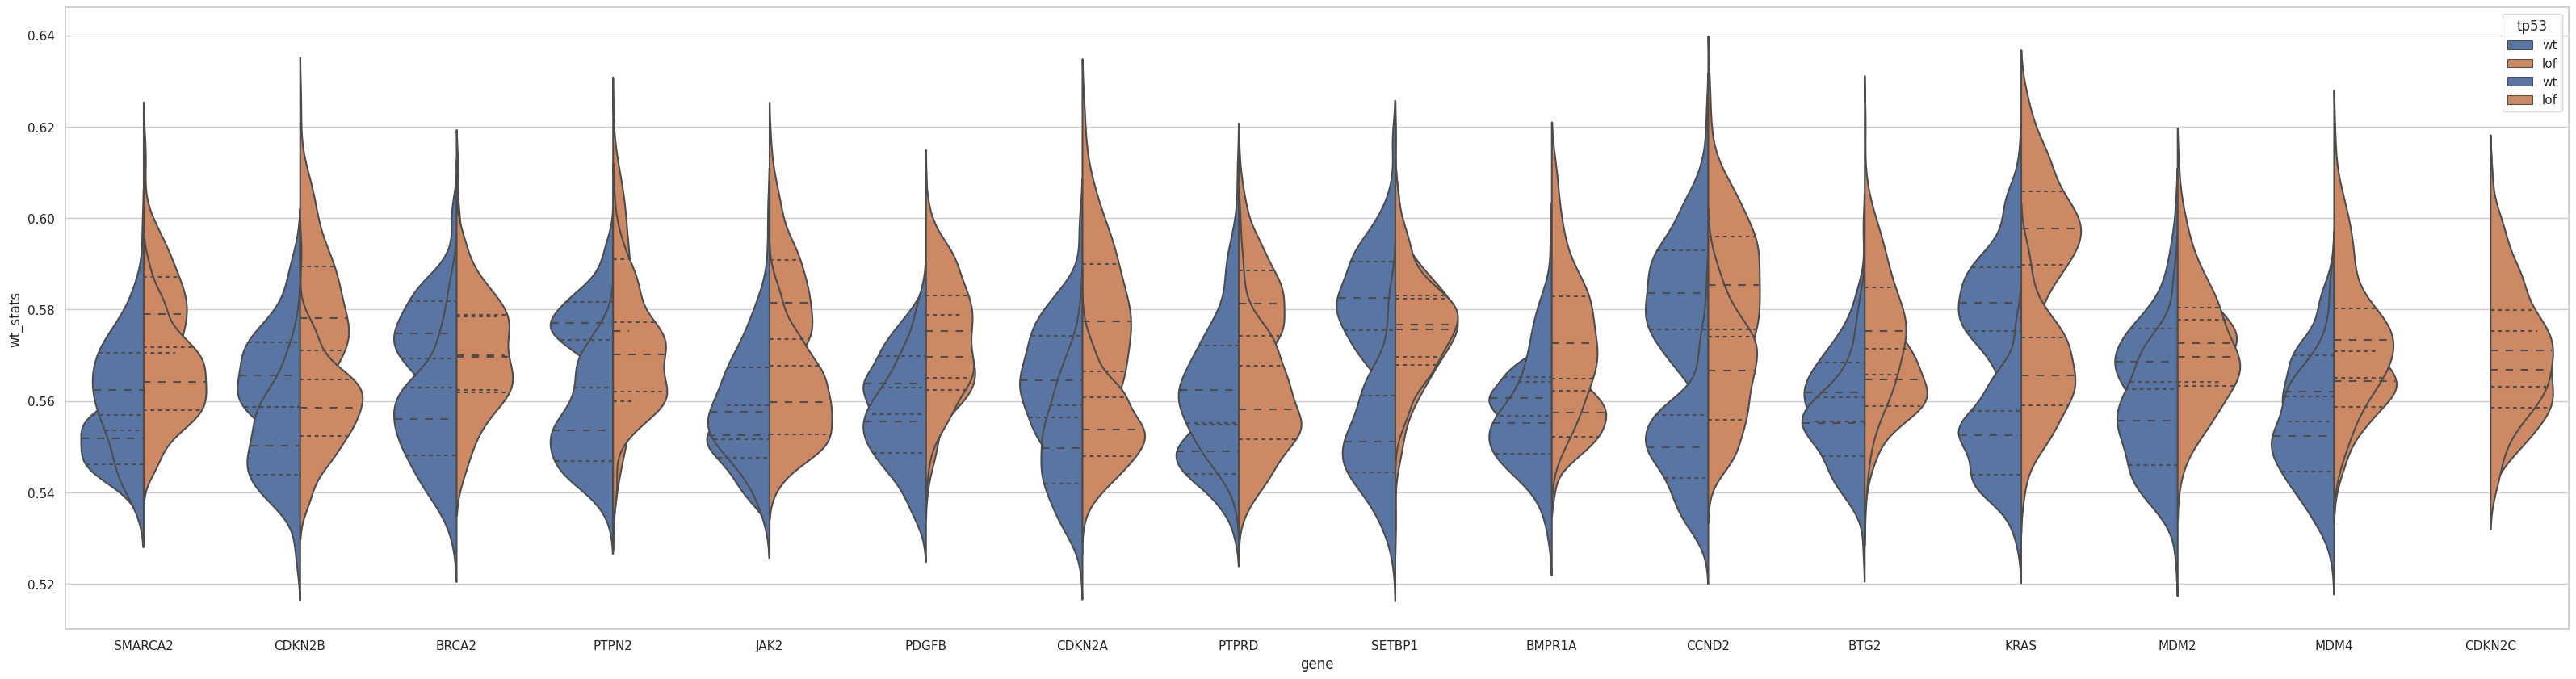

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40, 10)})

sns.set_style("whitegrid")
sns.violinplot(data=select_2, x="gene", y="test_stats", hue="tp53", split=True, inner="quartile")
sns.violinplot(data=select_2, x="gene", y="wt_stats", hue="tp53", split=True, inner="quartile")

In [52]:
# weird genes

weird_genes = ['HLA-C']

weird_lof_tp53_lof = bootstrap_stats(
    genes_of_interest=weird_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=1,
    fixed_sampling=True,
)
weird_lof_tp53_lof.to_csv("outputs/weird_lof_bootstrap_results_tp53_lof.csv")

weird_amp_filtered_tp53_lof = bootstrap_stats(
    genes_of_interest=weird_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_lof_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=1,
    fixed_sampling=True,
    filter_amp=True,
)
weird_amp_filtered_tp53_lof.to_csv("outputs/weird_amp_filtered_bootstrap_results_tp53_lof.csv")

# top on TP53 WT

weird_lof_tp53_wt = bootstrap_stats(
    genes_of_interest=weird_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="lof",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=1,
    fixed_sampling=True,
)
weird_lof_tp53_wt.to_csv("outputs/weird_lof_bootstrap_results_tp53_wt.csv")

weird_amp_filtered_tp53_wt = bootstrap_stats(
    genes_of_interest=weird_genes,
    dependency_data=crispr_effect,
    cnv_data=cnv_data,
    mutation_data=mutation_data,
    candidate_models=tp53_wt_models,
    search_mode="amp",
    n_bootstrap=128,
    eval_function=genome_proximity_bias_score,
    eval_kwargs={"n_samples": 500, "n_trials": 200, "return_samples": False},
    n_workers=1,
    fixed_sampling=True,
    filter_amp=True,
)
weird_amp_filtered_tp53_wt.to_csv("outputs/weird_amp_filtered_bootstrap_results_tp53_wt.csv")

weird_lof_tp53_wt = pd.read_csv("outputs/weird_lof_bootstrap_results_tp53_wt.csv", index_col=0)
weird_amp_filtered_tp53_wt = pd.read_csv("outputs/weird_amp_bootstrap_results_tp53_wt.csv", index_col=0)
weird_lof_tp53_wt["abs_diff"] = weird_lof_tp53_wt["diff"].abs()
weird_amp_filtered_tp53_wt["abs_diff"] = weird_amp_filtered_tp53_wt["diff"].abs()
weird_lof_tp53_wt["tp53"] = "wt"
weird_amp_filtered_tp53_wt["tp53"] = "wt"

weird_lof_tp53_lof = pd.read_csv("outputs/weird_lof_bootstrap_results_tp53_lof.csv", index_col=0)
weird_amp_filtered_tp53_lof = pd.read_csv("outputs/weird_amp_bootstrap_results_tp53_lof.csv", index_col=0)
weird_lof_tp53_lof["abs_diff"] = weird_lof_tp53_lof["diff"].abs()
weird_amp_filtered_tp53_lof["abs_diff"] = weird_amp_filtered_tp53_lof["diff"].abs()
weird_lof_tp53_lof["tp53"] = "lof"
weird_amp_filtered_tp53_lof["tp53"] = "lof"
weird = pd.concat([weird_lof_tp53_wt, weird_amp_filtered_tp53_wt, weird_lof_tp53_lof, weird_amp_filtered_tp53_lof], axis=0)
weird.sort_index()[["tp53", "search_mode", "diff", "wt_mean", "test_mean", "n_sample_bootstrap"]]

Stats for HLA-C computed in 216.41621327400208 - diff is -0.009848184687499928, 156 wt and 42 lof
Stats for HLA-C computed in 216.79285979270935 - diff is -0.005122819218749908, 156 wt and 53 amp
Stats for HLA-C computed in 212.83130979537964 - diff is 0.0016925757812500386, 158 wt and 32 lof
Stats for HLA-C computed in 215.70242762565613 - diff is 0.022301268437500132, 158 wt and 33 amp


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/weird_amp_bootstrap_results_tp53_wt.csv'